In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [24]:
path_2 = 'backtests/resources/round1/prices_round_1_day_-2.csv'
path_1 = 'backtests/resources/round1/prices_round_1_day_-1.csv'
path = 'backtests/resources/round1/prices_round_1_day_0.csv'
#concat the 3 csv
df_2 = pd.read_csv(path_2, sep=";")
df_1 = pd.read_csv(path_1, sep=";")
df_0 = pd.read_csv(path, sep=";")
tick_span = 999900
df_1['timestamp'] += tick_span
df_0['timestamp'] += 2 * tick_span
df = pd.concat([df_2, df_1, df_0], ignore_index=True)

display(df)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


day  timestamp           product  bid_price_1  bid_volume_1  \
0       -2          0  RAINFOREST_RESIN         9996             1   
1       -2          0              KELP         1998            26   
2       -2          0         SQUID_INK         1998            26   
3       -2        100         SQUID_INK         1999             5   
4       -2        100  RAINFOREST_RESIN        10000             5   
...    ...        ...               ...          ...           ...   
89995    0    2999600              KELP         2032            27   
89996    0    2999600  RAINFOREST_RESIN         9995            27   
89997    0    2999700  RAINFOREST_RESIN         9996             2   
89998    0    2999700         SQUID_INK         1838            23   
89999    0    2999700              KELP         2032            23   

       bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0           9995.0          25.0          NaN           NaN        10004   
1              NaN           NaN          NaN           NaN         2002   
2              NaN           NaN          NaN           NaN         2002   
3           1998.0          26.0          NaN           NaN         2001   
4           9995.0          20.0          NaN           NaN        10005   
...            ...           ...          ...           ...          ...   
89995          NaN           NaN          NaN           NaN         2034   
89996          NaN           NaN          NaN           NaN        10005   
89997       9995.0          21.0          NaN           NaN        10004   
89998          NaN           NaN          NaN           NaN         1841   
89999          NaN           NaN          NaN           NaN         2035   

       ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0                 1      10005.0          25.0          NaN           NaN   
1                26          NaN           NaN          NaN           NaN   
2                26          NaN           NaN          NaN           NaN   
3                20          NaN           NaN          NaN           NaN   
4                20          NaN           NaN          NaN           NaN   
...             ...          ...           ...          ...           ...   
89995             1       2035.0          27.0          NaN           NaN   
89996            27          NaN           NaN          NaN           NaN   
89997             2      10005.0          21.0          NaN           NaN   
89998            23          NaN           NaN          NaN           NaN   
89999            23          NaN           NaN          NaN           NaN   

       mid_price  profit_and_loss  
0        10000.0              0.0  
1         2000.0              0.0  
2         2000.0              0.0  
3         2000.0              0.0  
4        10002.5              0.0  
...          ...              ...  
89995     2033.0              0.0  
89996    10000.0              0.0  
89997    10000.0              0.0  
89998     1839.5              0.0  
89999     2033.5              0.0  

[90000 rows x 17 columns]

In [25]:
df_ink = df[df['product'] == 'SQUID_INK']
display(df_ink[0:5])

day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
2    -2          0  SQUID_INK         1998            26          NaN   
3    -2        100  SQUID_INK         1999             5       1998.0   
7    -2        200  SQUID_INK         1997            31          NaN   
11   -2        300  SQUID_INK         1997            27          NaN   
14   -2        400  SQUID_INK         1996            20          NaN   

    bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
2            NaN          NaN           NaN         2002            26   
3           26.0          NaN           NaN         2001            20   
7            NaN          NaN           NaN         2000             1   
11           NaN          NaN           NaN         2000            27   
14           NaN          NaN           NaN         2000            20   

    ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
2           NaN           NaN          NaN           NaN     2000.0   
3           NaN           NaN          NaN           NaN     2000.0   
7        2001.0          30.0          NaN           NaN     1998.5   
11          NaN           NaN          NaN           NaN     1998.5   
14          NaN           NaN          NaN           NaN     1998.0   

    profit_and_loss  
2               0.0  
3               0.0  
7               0.0  
11              0.0  
14              0.0

In [31]:
N = 20  # number of timestamps to look back
dt = 100
window_size = N * dt

timestamps = df_ink['timestamp'].values
weighted_bid = []
weighted_ask = []

for t in timestamps:
    window_df = df_ink[(df_ink['timestamp'] > t - window_size) & (df_ink['timestamp'] <= t)]

    bid_total, bid_volume = 0, 0
    ask_total, ask_volume = 0, 0

    for i in range(1, 4):
        bp = window_df[f'bid_price_{i}']
        bv = window_df[f'bid_volume_{i}']
        mask = bp.notna() & bv.notna()
        bid_total += (bp[mask] * bv[mask]).sum()
        bid_volume += bv[mask].sum()

        ap = window_df[f'ask_price_{i}']
        av = window_df[f'ask_volume_{i}']
        mask = ap.notna() & av.notna()
        ask_total += (ap[mask] * av[mask]).sum()
        ask_volume += av[mask].sum()

    weighted_bid.append(bid_total / bid_volume if bid_volume > 0 else np.nan)
    weighted_ask.append(ask_total / ask_volume if ask_volume > 0 else np.nan)

df_ink['rolling_weighted_bid'] = weighted_bid
df_ink['rolling_weighted_ask'] = weighted_ask

/tmp/ipykernel_25261/2639575201.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ink['rolling_weighted_bid'] = weighted_bid
/tmp/ipykernel_25261/2639575201.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ink['rolling_weighted_ask'] = weighted_ask


Price range for split 0: 1946 to 2012
Price range for split 1: 1953 to 2148
Price range for split 2: 2032 to 2192
Price range for split 3: 1944 to 2067
Price range for split 4: 1926 to 2007
Price range for split 5: 1921 to 2049
Price range for split 6: 1825 to 2035
Price range for split 7: 1903 to 1977
Price range for split 8: 1866 to 1966
Price range for split 9: 1804 to 1903


/tmp/ipykernel_25261/1418598011.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


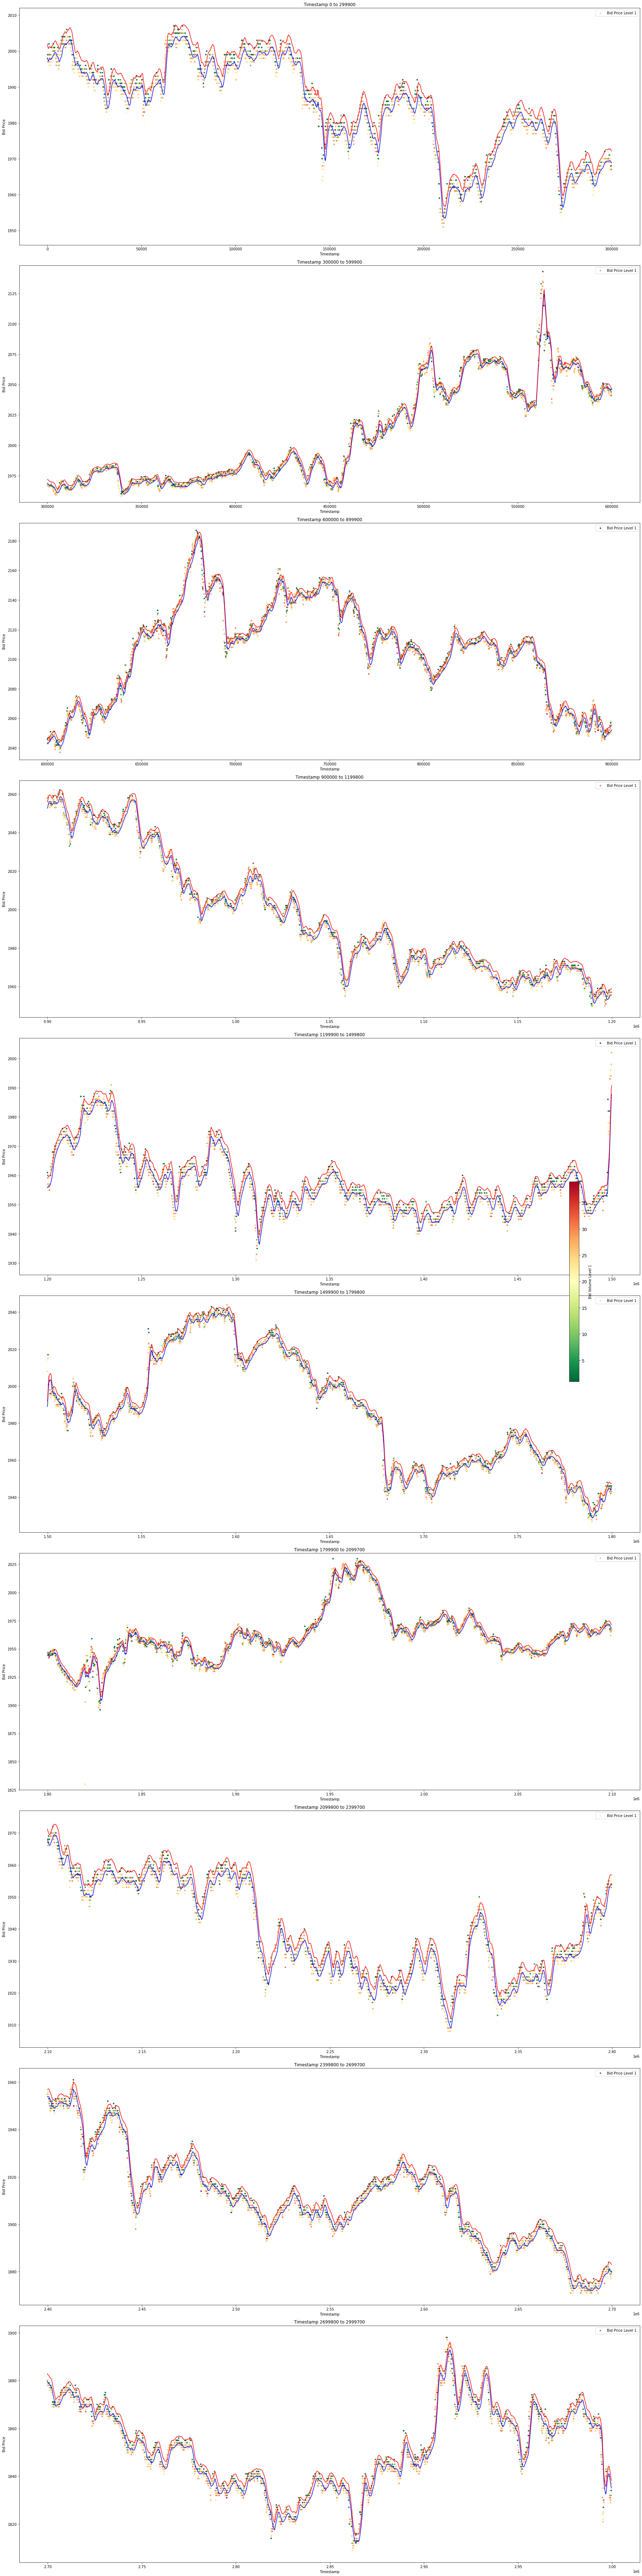

In [44]:
n_splits = 10
timestamps = df_ink['timestamp'].values
split_edges = np.array_split(timestamps, n_splits)

fig, axes = plt.subplots(n_splits, 1, figsize=(25, 10 * n_splits), sharey=False)  # Remove sharey=True

for i, ax in enumerate(axes):
    ts_range = (split_edges[i][0], split_edges[i][-1])
    df_slice = df_ink[(df_ink['timestamp'] >= ts_range[0]) & (df_ink['timestamp'] <= ts_range[1])]
    price_min = df_slice['bid_price_1'].dropna().min()
    price_max = df_slice['bid_price_1'].dropna().max()
    y_min = price_min - 5
    y_max = price_max + 5
    print(f"Price range for split {i}: {y_min} to {y_max}")
    sc = ax.scatter(df_slice['timestamp'], df_slice['bid_price_1'], c=df_slice['bid_volume_1'],
                    cmap='RdYlGn_r', s=10, label='Bid Price Level 1')

    ax.plot(df_slice['timestamp'], df_slice['rolling_weighted_bid'], color='blue')
    ax.plot(df_slice['timestamp'], df_slice['rolling_weighted_ask'], color='red')

    ax.set_title(f'Timestamp {ts_range[0]} to {ts_range[1]}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Bid Price')
    ax.set_ylim(y_min, y_max)  # Different limits for each subplot
    ax.legend()

# Thinner colorbar on the right
cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), label='Bid Volume Level 1', fraction=0.02, pad=0.04)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


Price range for split 0: 1949 to 2014
Price range for split 1: 1955 to 2149
Price range for split 2: 2036 to 2194
Price range for split 3: 1946 to 2070
Price range for split 4: 1928 to 2010
Price range for split 5: 1923 to 2052
Price range for split 6: 1829 to 2036
Price range for split 7: 1905 to 1979
Price range for split 8: 1867 to 1968
Price range for split 9: 1806 to 1906


/tmp/ipykernel_25261/1648155853.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


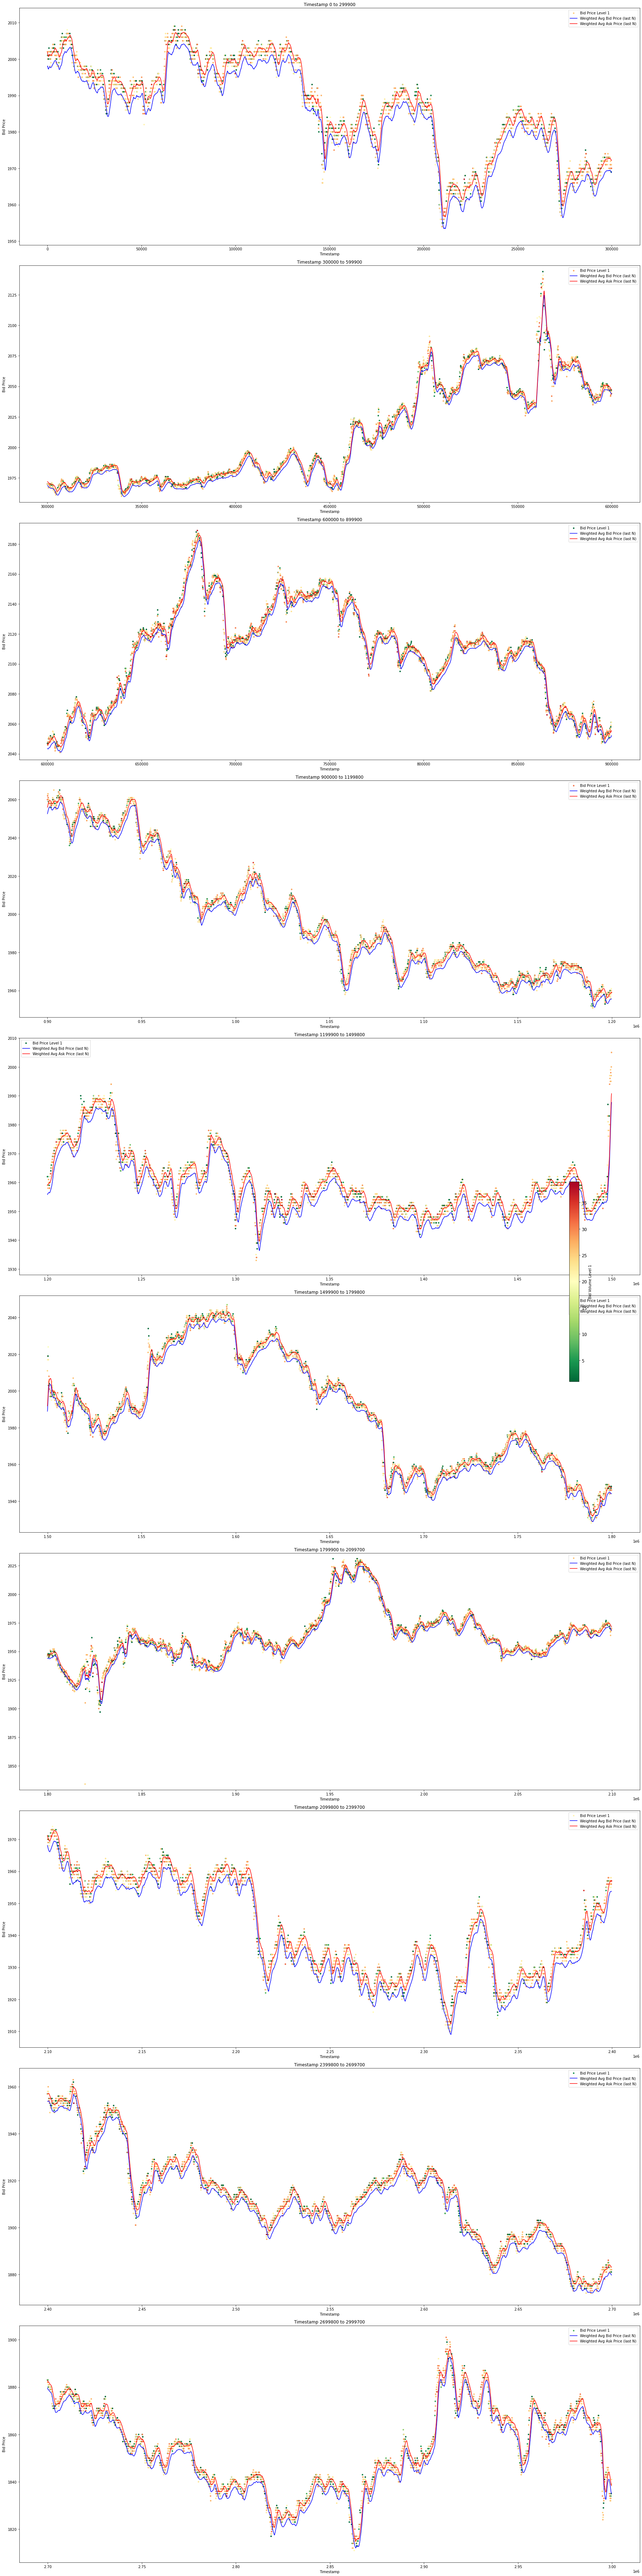

In [46]:
n_splits = 10
timestamps = df_ink['timestamp'].values
split_edges = np.array_split(timestamps, n_splits)

fig, axes = plt.subplots(n_splits, 1, figsize=(25, 10 * n_splits), sharey=False)  # Remove sharey=True

for i, ax in enumerate(axes):
    ts_range = (split_edges[i][0], split_edges[i][-1])
    df_slice = df_ink[(df_ink['timestamp'] >= ts_range[0]) & (df_ink['timestamp'] <= ts_range[1])]
    price_min = df_slice['ask_price_1'].dropna().min()
    price_max = df_slice['ask_price_1'].dropna().max()
    y_min = price_min - 5
    y_max = price_max + 5
    print(f"Price range for split {i}: {y_min} to {y_max}")
    sc = ax.scatter(df_slice['timestamp'], df_slice['ask_price_1'], c=df_slice['bid_volume_1'],
                    cmap='RdYlGn_r', s=10, label='Bid Price Level 1')

    ax.plot(df_slice['timestamp'], df_slice['rolling_weighted_bid'], color='blue')
    ax.plot(df_slice['timestamp'], df_slice['rolling_weighted_ask'], color='red')
    ax.plot([], [], color='blue', label='Weighted Avg Bid Price (last N)')
    ax.plot([], [], color='red', label='Weighted Avg Ask Price (last N)')
    
    

    ax.set_title(f'Timestamp {ts_range[0]} to {ts_range[1]}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Bid Price')
    ax.set_ylim(y_min, y_max)  # Different limits for each subplot
    ax.legend()

# Thinner colorbar on the right
cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), label='Bid Volume Level 1', fraction=0.02, pad=0.04)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()
